In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
#Daten einlesen
df_erdbeben = gpd.read_file("erdbeben.json")

In [4]:
print(df_erdbeben.head())

           id   mag                           place           time  \
0  ok2022fsoi  2.14      8 km SSE of Meno, Oklahoma  1648020119195   
1  hv72959742  2.24  16 km S of Fern Forest, Hawaii  1648019829910   
2  nc73709176  0.67      4km NNW of The Geysers, CA  1648019657830   
3  hv72959727  2.27      9 km ENE of Pāhala, Hawaii  1648018848890   
4  hv72959722  2.04       8 km NE of Pāhala, Hawaii  1648018716420   

         updated    tz                                                url  \
0  1648020344741  None  https://earthquake.usgs.gov/earthquakes/eventp...   
1  1648020159470  None  https://earthquake.usgs.gov/earthquakes/eventp...   
2  1648019755019  None  https://earthquake.usgs.gov/earthquakes/eventp...   
3  1648019178220  None  https://earthquake.usgs.gov/earthquakes/eventp...   
4  1648018905350  None  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail  felt  cdi  ...  sources  \
0  https://earthquake.usgs.gov/eart

In [5]:
df_erdbeben.isna().sum()

id             0
mag            0
place          0
time           0
updated        0
tz          1994
url            0
detail         0
felt        1818
cdi         1818
mmi         1966
alert       1984
status         0
tsunami        0
sig            0
net            0
code           0
ids            0
sources        0
types          0
nst          480
dmin         633
rms            0
gap          267
magType        0
type           0
title          0
geometry       0
dtype: int64

In [6]:
for i in range(len(df_erdbeben)):
    if df_erdbeben["alert"][i] != None:
        print(df_erdbeben["alert"][i])

green
green
green
green
green
green
yellow
green
orange
green


In [24]:
df_erdbeben.head()

,id,mag,place,time,updated,tz,felt,cdi,mmi,alert,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,ok2022fsoi,2.14,"8 km SSE of Meno, Oklahoma",1648020119195,1648020344741,None,NaN,NaN,NaN,None,...,",ok,",",origin,phase-data,",38.0,0.221780,0.588481,65.595261,ml,earthquake,"M 2.1 - 8 km SSE of Meno, Oklahoma",POINT Z (-98.13358 36.31862 2.74982)
1,hv72959742,2.24,"16 km S of Fern Forest, Hawaii",1648019829910,1648020159470,None,NaN,NaN,NaN,None,...,",hv,",",origin,phase-data,",39.0,NaN,0.180000,158.000000,ml,earthquake,"M 2.2 - 16 km S of Fern Forest, Hawaii",POINT Z (-155.11250 19.32050 5.41000)
2,nc73709176,0.67,"4km NNW of The Geysers, CA",1648019657830,1648019755019,None,NaN,NaN,NaN,None,...,",nc,",",nearby-cities,origin,phase-data,",10.0,0.007653,0.010000,67.000000,md,earthquake,"M 0.7 - 4km NNW of The Geysers, CA",POINT Z (-122.77934 38.80567 2.21000)
3,hv72959727,2.27,"9 km ENE of Pāhala, Hawaii",1648018848890,1648019178220,None,NaN,NaN,NaN,None,...,",hv,",",origin,phase-data,",43.0,NaN,0.120000,133.000000,ml,earthquake,"M 2.3 - 9 km ENE of Pāhala, Hawaii",POINT Z (-155.40350 19.24350 32.26000)
4,hv72959722,2.04,"8 km NE of Pāhala, Hawaii",1648018716420,1648018905350,None,NaN,NaN,NaN,None,...,",hv,",",origin,phase-data,",29.0,NaN,0.110000,129.000000,md,earthquake,"M 2.0 - 8 km NE of Pāhala, Hawaii",POINT Z (-155.41167 19.24950 32.39000)


In [8]:
df_erdbeben.dtypes

id            object
mag          float64
place         object
time           int64
updated        int64
tz            object
url           object
detail        object
felt         float64
cdi          float64
mmi          float64
alert         object
status        object
tsunami        int64
sig            int64
net           object
code          object
ids           object
sources       object
types         object
nst          float64
dmin         float64
rms          float64
gap          float64
magType       object
type          object
title         object
geometry    geometry
dtype: object

In [9]:
df_erdbeben.duplicated().sum()

0

In [10]:
df_erdbeben = df_erdbeben.drop(columns=["url", "detail"])

In [11]:
df_erdbeben_factor = df_erdbeben.astype({"type": "category", "alert": "category", "magType": "category", "sources": "category", "tsunami":"category"})

In [12]:
df_erdbeben_factor["tsunami"]

0       0
1       0
2       0
3       0
4       0
       ..
1989    0
1990    0
1991    0
1992    0
1993    0
Name: tsunami, Length: 1994, dtype: category
Categories (2, int64): [0, 1]

In [13]:
df_erdbeben_factor.describe()

,mag,time,updated,felt,cdi,mmi,sig,nst,dmin,rms,gap
count,1994.000000,1.994000e+03,1.994000e+03,176.000000,176.000000,28.000000,1994.000000,1514.000000,1361.000000,1994.000000,1727.000000
mean,1.673862,1.647714e+12,1.647761e+12,23.289773,2.601705,4.067464,67.695587,20.522457,0.586449,0.253422,122.203205
std,1.238916,1.740024e+08,1.778807e+08,111.178986,1.424940,2.169704,103.762679,17.872792,2.253934,0.284587,66.243840
min,-1.360000,1.647416e+12,1.647417e+12,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,18.000000
25%,0.850000,1.647567e+12,1.647612e+12,1.000000,2.000000,2.781000,11.000000,8.000000,0.017250,0.073050,72.000000
50%,1.465000,1.647698e+12,1.647793e+12,2.000000,2.200000,4.008500,33.000000,15.000000,0.054230,0.130000,106.000000
75%,2.120000,1.647874e+12,1.647908e+12,5.000000,3.400000,5.571500,70.000000,27.000000,0.155400,0.297500,161.000000
max,7.300000,1.648020e+12,1.648021e+12,984.000000,8.600000,8.008000,1301.000000,198.000000,45.917000,2.330000,351.000000


In [14]:
df_erdbeben_factor["date"]=0
df_erdbeben_factor["depth"]=0

In [15]:
for i in range(len(df_erdbeben_factor)):
    df_erdbeben_factor["date"][i] = datetime.datetime.fromtimestamp(df_erdbeben_factor["time"][i] / 1000).strftime('%d/%m/%y %H:%M:%S')
    df_erdbeben_factor["depth"][i] = df_erdbeben_factor["geometry"][i].z

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_10003/2326743471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erdbeben_factor["date"][i] = datetime.datetime.fromtimestamp(df_erdbeben_factor["time"][i] / 1000).strftime('%d/%m/%y %H:%M:%S')
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_10003/2326743471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [16]:
df_erdbeben_factor.head()

,id,mag,place,time,updated,tz,felt,cdi,mmi,alert,...,nst,dmin,rms,gap,magType,type,title,geometry,date,depth
0,ok2022fsoi,2.14,"8 km SSE of Meno, Oklahoma",1648020119195,1648020344741,None,NaN,NaN,NaN,NaN,...,38.0,0.221780,0.588481,65.595261,ml,earthquake,"M 2.1 - 8 km SSE of Meno, Oklahoma",POINT Z (-98.13358 36.31862 2.74982),23/03/22 08:21:59,2
1,hv72959742,2.24,"16 km S of Fern Forest, Hawaii",1648019829910,1648020159470,None,NaN,NaN,NaN,NaN,...,39.0,NaN,0.180000,158.000000,ml,earthquake,"M 2.2 - 16 km S of Fern Forest, Hawaii",POINT Z (-155.11250 19.32050 5.41000),23/03/22 08:17:09,5
2,nc73709176,0.67,"4km NNW of The Geysers, CA",1648019657830,1648019755019,None,NaN,NaN,NaN,NaN,...,10.0,0.007653,0.010000,67.000000,md,earthquake,"M 0.7 - 4km NNW of The Geysers, CA",POINT Z (-122.77934 38.80567 2.21000),23/03/22 08:14:17,2
3,hv72959727,2.27,"9 km ENE of Pāhala, Hawaii",1648018848890,1648019178220,None,NaN,NaN,NaN,NaN,...,43.0,NaN,0.120000,133.000000,ml,earthquake,"M 2.3 - 9 km ENE of Pāhala, Hawaii",POINT Z (-155.40350 19.24350 32.26000),23/03/22 08:00:48,32
4,hv72959722,2.04,"8 km NE of Pāhala, Hawaii",1648018716420,1648018905350,None,NaN,NaN,NaN,NaN,...,29.0,NaN,0.110000,129.000000,md,earthquake,"M 2.0 - 8 km NE of Pāhala, Hawaii",POINT Z (-155.41167 19.24950 32.39000),23/03/22 07:58:36,32


In [17]:
df_erdbeben_factor.describe()

,mag,time,updated,felt,cdi,mmi,sig,nst,dmin,rms,gap,depth
count,1994.000000,1.994000e+03,1.994000e+03,176.000000,176.000000,28.000000,1994.000000,1514.000000,1361.000000,1994.000000,1727.000000,1994.000000
mean,1.673862,1.647714e+12,1.647761e+12,23.289773,2.601705,4.067464,67.695587,20.522457,0.586449,0.253422,122.203205,19.812939
std,1.238916,1.740024e+08,1.778807e+08,111.178986,1.424940,2.169704,103.762679,17.872792,2.253934,0.284587,66.243840,48.987353
min,-1.360000,1.647416e+12,1.647417e+12,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,18.000000,-3.000000
25%,0.850000,1.647567e+12,1.647612e+12,1.000000,2.000000,2.781000,11.000000,8.000000,0.017250,0.073050,72.000000,2.000000
50%,1.465000,1.647698e+12,1.647793e+12,2.000000,2.200000,4.008500,33.000000,15.000000,0.054230,0.130000,106.000000,7.000000
75%,2.120000,1.647874e+12,1.647908e+12,5.000000,3.400000,5.571500,70.000000,27.000000,0.155400,0.297500,161.000000,15.000000
max,7.300000,1.648020e+12,1.648021e+12,984.000000,8.600000,8.008000,1301.000000,198.000000,45.917000,2.330000,351.000000,616.000000


In [18]:
koordinaten_check = gpd.GeoSeries(df_erdbeben_factor["geometry"])

In [19]:
koordinaten_check.is_valid.sum()

1994

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdd59585160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdd595857c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdd69543b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd59585ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd5958d2b0>],
 'means': []}

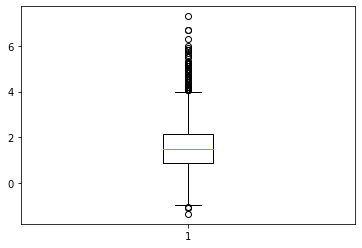

In [20]:
plt.boxplot(x=df_erdbeben_factor["mag"])

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Magnitude')

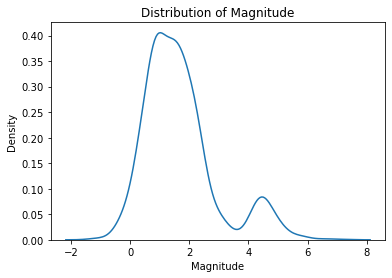

In [26]:
sns.distplot(df_erdbeben_factor["mag"], hist=False)
plt.xlabel("Magnitude")
plt.title("Distribution of Magnitude")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdd695b9ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdd695c5400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdd695b9910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd695c5b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd695c5eb0>],
 'means': []}

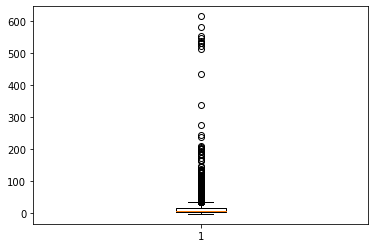

In [22]:
plt.boxplot(x=df_erdbeben_factor["depth"])

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of depth')

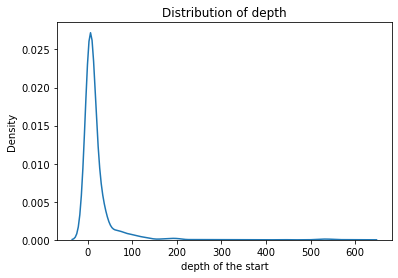

In [23]:
sns.distplot(df_erdbeben_factor["depth"], hist=False)
plt.xlabel("depth of the start")
plt.title("Distribution of depth")